# Bradford assay 기반 단백질 정량 실험 보고서


* 작성일: 2025-04-29
* 학과: AI의약바이오
* 학번: 2503110220
* 작성자: 최재영


--- 

## 1. 실험 목적
* Bradford assay와 UV-Vis Spectrophotometer를 사용하여 **BSA protein 흡광도를 측정** 하고 BSA standard curve 그린 후 **eGFP 미지 농도를 구한다.**

## 2.실험 재료

<style>
.jp-RenderedHTMLCommon table {
    margin-left: 0 !important;
    margin-right: auto !important;
} 
</style>   

|실험 재료|
|-|
|1 BSA (Bovine serum albumin) protein stock|
|2 5X Bradford stock solution| 
|3 DDW| 
|4 UV-Vis spectrophotometer|
|5 eGFP|
|6 Micro Pipette|
|7 ep-tube|
|8 conical tube|
|9 Ice Bucket|
|10 PMMA Cuvette|
|11 tip|
|12  ICE|

|시약명|개수|필요량|
|-|-|-|
|BSA proteins|1|1mg/mL|
|5X Bradford stock|1|10mL|
|1X Bradford reagent|1|990uL|
|eGFP|1|10uL|

## 3.실험 방법

(1) 1.4mg/mL BSA proteins 1mg/mL로 1차 희석한다.


2) 1mg/mL, 0.5mg/mL, 0.25 mg/mL, 0.125 mg/mL, 0.0625 mg/mL로 2배씩 총 4단계 희석해 총 5개의 각각 다른 농도의 BSA Protein을 만든다.


3) Protein은 ICE에 놓고 사용하며 5X Bradford를 1X 농도로 5배 10mL로 희석한다.


4) Ep-tube에 990μL의 1X Bradford reagent 첨가 후 10μL의 BSA Standard (1 – 0.0625 mg/mL) 첨가한다.


5) 동시에 Ep-tube에 990μL의 1X Bradford reagent 첨가 후 10μL의 미지 농도의 eGFP첨가한다.


6) 10분 실온에서 배양 후 PMMA cuvette 에 반응용액 1mL 옮긴다.


7) UV-Vis Spectrophotometer를 이용해 595nm 파장에서 흡광도 측정한다.


8) BSA Standard Curve 그리고 형광 단백질인 eGFP 미지시료의 농도를 구한다.


# 4.실험 결과

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy

mpl.rcParams['font.family'] = 'Malgun Gothic'

In [131]:
filepath = 'D:/01_생명정보개론/01_script/통합 문서1.xlsx'

## 4.1 BSA 농도별 흡광도 측정 결과

In [132]:
result = pd.read_excel(filepath)

In [133]:
result

,BSA 농도,흡광도
0,0.0000,0.000
1,0.0625,0.041
2,0.1250,0.078
3,0.2500,0.137
4,0.5000,0.279
5,1.0000,0.527


In [134]:
x = data["BSA 농도"]
y = data["흡광도"]

## 4.2. Standard Curve 산출하기

In [135]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
rsq = round(r_value**2, 4)
equation = f'$y={slope:.2f}x + {intercept:.2f}$\n$R^2={rsq:.2f}$'

In [136]:
slope, intercept

(np.float64(0.523974193548387), np.float64(0.007800000000000029))

## 4.3. 미지 시료의 농도 추정하기

In [137]:
unknown = 0.303

In [138]:
unknown_conc = round((unknown-intercept)/slope, 5)

In [139]:
unknown_conc

np.float64(0.56339)

## 4.4. 그래프 그리기

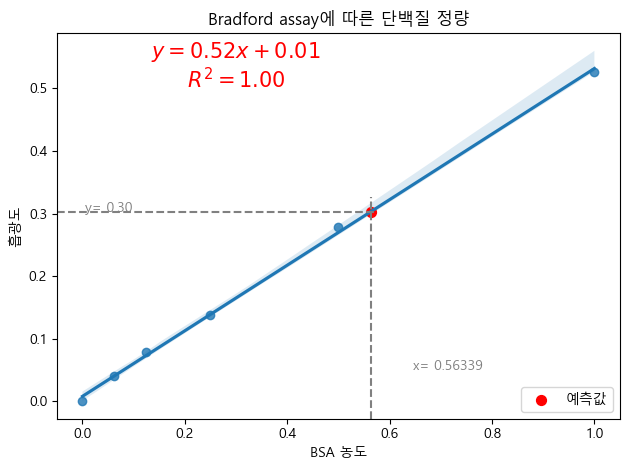

In [140]:
ax = sns.regplot(x=data['BSA 농도'],y=data['흡광도'])
ax.annotate(equation, xy= (0.3,0.5), ha = 'center', fontsize = 15, color = 'red')

plt.scatter(unknown_conc, unknown, color='red', s=50, label="예측값")
plt.axvline(x=unknown_conc, ymin=00, ymax=(unknown - min(y)) / (max(y)-min(y)), linestyle='--', color='gray')
plt.axhline(y=unknown, xmin=00, xmax=(unknown_conc - min(x)) / (max(x)-min(x)), linestyle='--', color='gray')

plt.text(unknown_conc+0.082, 0.05, f"x= {unknown_conc}", fontsize=10, color='gray')
plt.text(0.005, unknown +0., f"y= {unknown:.2f}", fontsize=10, color="gray")

plt.legend()

plt.title("Bradford assay에 따른 단백질 정량")
plt.ylabel("흡광도")
plt.xlabel("BSA 농도")
plt.tight_layout()
plt.show()

# 5.실험 결론

|미지의 시료 계산식|
|-|
|0.303 = 0.5108x + 0.0114|
|0.5108x = 0.303 – 0.0114|
|x= 0.303-0.0114 / 0.5108|
|=(0.303-0.0114) / 0.5108 = 0.5708692247μg/mL|


미지 시료의 흡광도는 0.303 농도는 ***0.5708692247μg/mL*** 으로 계산됐다.

# 6.고찰

* 이번에 진행한 실험 Protein quantification(단백질 정량 실험) 에서는 1.4mg/mL에서 1mg/mL으로 희석한 BSA proteins 표준 용액을 사용해 진행했다.   

* 희석한 BSA 표준 용액으로 UV-Vis Spectrophotometer를 이용해 BSA Standard Curve를 그리고 이를 바탕으로 미지 시료의 농도까지 측정했다.

* 하지만 처음 진행한 실험 결과에서는 흡광도 표준 곡선 R²값이 =0.992 미만으로 기댓값보다 훨씬 낮게 측정됐다.

* 그래서 여러 번 실험을 반복해서 만족하는 기댓값을 측정하기 위해 굴하지 않고,
 견뎌 내면서 만족하는 R²=0.993 이상의 값을 측정하기 위해 실험을 여러 번 반복했다.

* 이에 만족하는 R² 값을 표출하기 위해 여러 차례 BSA Protein을 희석하면서 느낀 점은
 조금 더 Micro Pipette을 능숙하게 Shake Shake하고 정확하게 원하는 μL 값을 착출할 수 있도록 노력하자.

* 또한 실험을 시작하기 전 정확한 농도, 용량, 질량, 밀도, 등 다양한 값들을 조금 더 빨리 계산하여 진행하자.

* 다음 실험에는 Pipette도 천천히 사용하여 용액을 추출하고 삽입하고 희석하자.

* 그래야 깔끔하고 빠르게 완벽한 덧없는 R² 값을 얻을 수 있다.